Enter natural freqeuncy value: 60
Enter the starting frequency point: 100
Enter the ending frequency point: 10000
Enter the number of octaves (6, 12, 24, or 48): 12
Enter amplitude of a half sine curve: 50
Enter half sine period (in milliseconds): 0.01


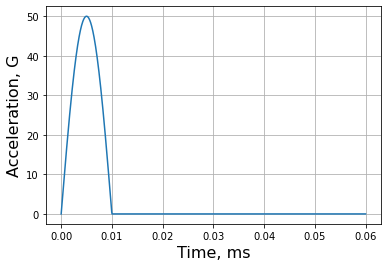

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.ticker as mticker


fn = int(input("Enter natural freqeuncy value: "))   # Test frequency
Q = 10  #Amplication factor


step_size = 1000
simulation_time = 0.06
Time = np.linspace(0,simulation_time, step_size)


def generate_frequency_data(start_freq, end_freq, num_octaves):
    # Calculating the fractional octave scaling factor
    scaling_factor = 2 ** (1 / num_octaves)

    # Generating frequency points
    frequencies = [start_freq]
    current_freq = start_freq
    while current_freq * scaling_factor <= end_freq:
        current_freq *= scaling_factor
        frequencies.append(current_freq)

    # Appending the end frequency if it's not already included
    if frequencies[-1] != end_freq:
        frequencies.append(end_freq)
        
start_freq = float(input("Enter the starting frequency point: "))
end_freq = float(input("Enter the ending frequency point: "))

while True:
    num_octaves = int(input("Enter the number of octaves (6, 12, 24, or 48): "))
    if num_octaves in [6, 12, 24, 48]:
        break
    else:
        print("Invalid input. Please enter a valid number of octaves.")
        
# Generating frequency data
frequency_df = generate_frequency_data(start_freq, end_freq, num_octaves)

#SRS graph
lower_frequency = 1
upper_frequency = 1000
num_freq_points = 200


# Tranfer function
z = signal.TransferFunction([(2*np.pi*fn)/Q,(2*np.pi*fn)**2], [1,(2*np.pi*fn)/Q, (2*np.pi*fn)**2])


Amplitude = int(input("Enter amplitude of a half sine curve: "))
half_sine_period = float(input("Enter half sine period (in milliseconds): "))

Function = Amplitude * np.sin(np.pi * Time / half_sine_period)

Function[Time > half_sine_period] = 0

plt.plot(Time, Function)
plt.grid(True)
plt.ylabel("Acceleration, G", fontsize = 16)
plt.xlabel("Time, ms", fontsize = 16)

time_output,x,y = signal.lsim(z,Function,Time)


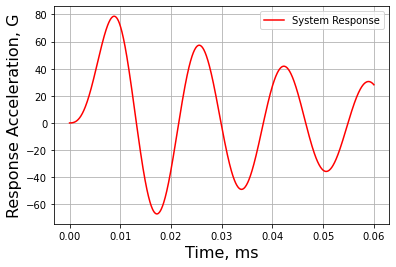

In [20]:
plt.figure(1)
plt.plot(time_output,x,"r-")
plt.ylabel("Response Acceleration, G", fontsize = 16)
plt.xlabel("Time, ms", fontsize = 16)
plt.grid(True)
plt.legend(["System Response"], loc = "best")

Peak Frequency: 81.322 Hz
Peak Response Acceleration: 82.571 G


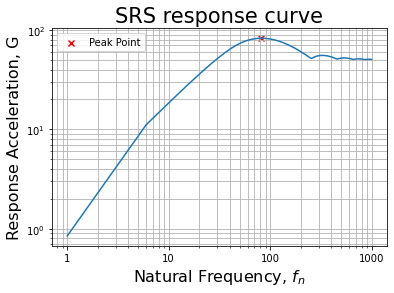

In [21]:
fn = np.linspace(lower_frequency,upper_frequency,num_freq_points)
x_g = []
for i in fn:
    z = signal.TransferFunction([(2*np.pi*i)/Q, (2*np.pi*i)**2], [1,(2*np.pi*i)/Q, (2*np.pi*i)**2])
    time_output,x,y = signal.lsim(z,Function,Time)
    x_g.append(np.max(abs(x)))
    
    
    
plt.loglog(fn,x_g)
plt.title("SRS response curve", fontsize = 21)
plt.xlabel("Natural Frequency, $f_{n}$", fontsize = 16)
plt.ylabel("Response Acceleration, G", fontsize = 16)
plt.grid(True, which = "both")
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())

peak_index = np.argmax(x_g)
peak_frequency = fn[peak_index]
peak_frequency_rounded = round(peak_frequency,3)
peak_response_acceleration = x_g[peak_index]
peak_response_acceleration_rounded = round(peak_response_acceleration,3)

print(f"Peak Frequency: {peak_frequency_rounded} Hz")
print(f"Peak Response Acceleration: {peak_response_acceleration_rounded} G")

plt.scatter(peak_frequency, peak_response_acceleration, color='red', marker='x', label='Peak Point')
plt.legend()
plt.show()